In [13]:
size=1000
# 60 DAYS standrd SIZE. Tunable.

In [14]:
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# =================================================================
# VARIABLE DICTIONARY:
# url   : The Stooq API endpoint 
# data  :historical OHLCV data.
# date  : The last 60 days
# op    : The last 60 "Open" prices (our main data points).
# low   : The lowest price in the set
# high  : The highest price in the set
# x     : The price axis. An array of every cent from low to high.
# val   : The activity counter. It tracks how many times each cent was "visited."
# y     : A mapping array used to identify specific price hits in the grid.
# k     : stores the price from the previous day for loop.
# i     : current price in looop.
# mask  : selects all cents in 'x' that fall between 'k' and 'i'.
# ===================================================



# 1. DATA ACQUISITION
# Fetching daily historical data for NVIDIA (NVDA)
url = "https://stooq.com/q/d/l/?s=nvda.us&i=d"
data = pd.read_csv(url)

# Isolate the most recent 30 days of Date and Open price data
date = data.tail(size)["Date"]
op = data.tail(size)["Open"]

# 2. COORDINATE SYSTEM SETUP
# Define the price boundaries based on the 30-day min and max
low = np.floor(min(op))
high = np.ceil(max(op))

# Create a range of every possible cent-price between the low and high
x = np.arange(low, high, 0.01)

# Initialize arrays to hold the "activity" counts and price mappings
val = np.zeros_like(x)
y = np.zeros_like(x)

# 3. THE ACTIVITY ALGORITHM
# 'k' holds the previous price; we initialize it with the first price in the set
k = op.iloc[0]

for i in op:
    # If price dropped: find all price points in 'x' between the current and previous
    if k > i: # Market going bonker down
        mask = (x < k) & (x > i)
        val[mask] += 1
    # If price is unchanged: find the exact match in 'x'
    elif k == i: # Useless
        mask = (x == k)
        val[mask] += 1
    # If price rose: find all price points in 'x' between the previous and current
    else: #GOing up
        mask = (x > k) & (x < i)
        val[mask] += 1
    
    # Update 'k' to the current price for the next iteration's comparison
    k = i

# Populate 'y' only where the price matches exactly an opening price
for i in op:
    mask = (x == i)
    y[mask] = i



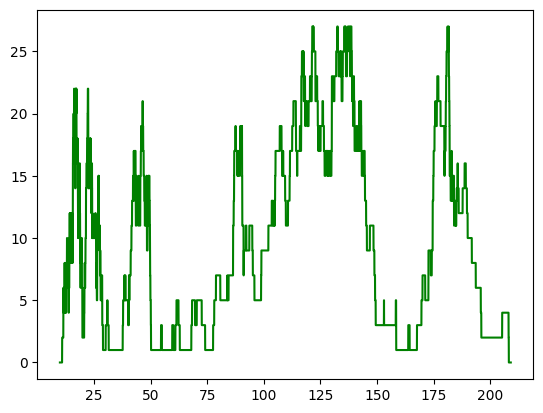

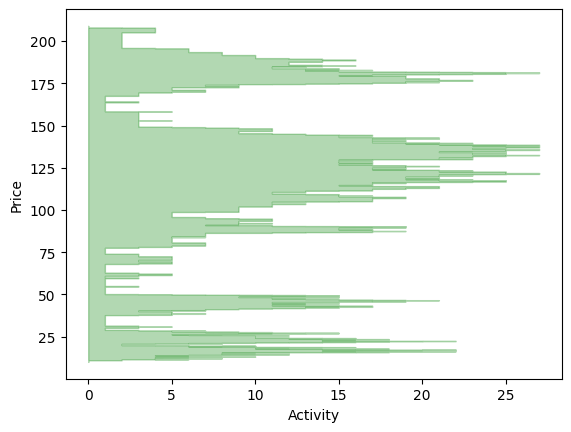

In [15]:
# 4. VISUALIZATION
# Plot 1: Line plot of Activity vs Price
plt.plot(x, val, color="green")
plt.show()

# Plot 2: Filled profile (similar to a   Bell Curve)
plt.fill_betweenx(x, 0, val, alpha=0.3, color="green")
plt.xlabel("Activity")
plt.ylabel("Price")
plt.show()